# `EEG` analysis of the `TUH-EEG` dataset
Short database description provided here for quick [reference](../Dataset_README.md)

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TUH_EEG_DATASET_PATH = "/home/rdadmin/Documents/Datasets/the-tuh-eeg-seizure-corpus-tusz/edf/"

In [3]:
os.listdir(TUH_EEG_DATASET_PATH)

['train', 'dev']

Get the `.edf`,`.tse`,`.lbl`,`.tse_bi`,`.lbl_bi` files of all the training samples.

In [4]:
train_edf = sorted(glob.glob(TUH_EEG_DATASET_PATH + "train/*/*/*/*/*.edf"))

train_tse = sorted(glob.glob(TUH_EEG_DATASET_PATH + "train/*/*/*/*/*.tse"))
train_tse_bi = sorted(glob.glob(TUH_EEG_DATASET_PATH + "train/*/*/*/*/*.tse_bi"))

train_lbl = sorted(glob.glob(TUH_EEG_DATASET_PATH + "train/*/*/*/*/*.lbl"))
train_lbl_bi = sorted(glob.glob(TUH_EEG_DATASET_PATH + "train/*/*/*/*/*.lbl_bi"))


dev_edf = sorted(glob.glob(TUH_EEG_DATASET_PATH + "dev/*/*/*/*/*.edf"))

dev_tse = sorted(glob.glob(TUH_EEG_DATASET_PATH + "dev/*/*/*/*/*.tse"))
dev_tse_bi = sorted(glob.glob(TUH_EEG_DATASET_PATH + "dev/*/*/*/*/*.tse_bi"))

dev_lbl = sorted(glob.glob(TUH_EEG_DATASET_PATH + "dev/*/*/*/*/*.lbl"))
dev_lbl_bi = sorted(glob.glob(TUH_EEG_DATASET_PATH + "dev/*/*/*/*/*.lbl_bi"))

In [5]:
len(train_edf),len(train_tse),len(train_tse_bi),len(train_lbl),len(train_lbl_bi)

(4599, 4599, 4599, 4599, 4599)

In [6]:
len(dev_edf),len(dev_tse),len(dev_tse_bi),len(dev_lbl),len(dev_lbl_bi)

(1013, 1013, 1013, 1013, 1013)

Check if a random index yields the same patient and session id for all files

In [7]:
id = np.random.randint(0,len(train_edf))
base_names = []
for file in [train_edf[id],train_tse[id],train_tse_bi[id],train_lbl[id],train_lbl_bi[id]]:
    base_name = os.path.basename(file)
    base_name = base_name.split(".")[0]
    print(base_name)
    base_names.append(base_name)

00011815_s006_t004
00011815_s006_t004
00011815_s006_t004
00011815_s006_t004
00011815_s006_t004


Create a dataframe 

In [8]:
import re
# use regular expression to fint the montage for each file
reg = r'[0-9]{2}_tcp_\w+'
train_montage = [re.findall(reg,file_name)[0] for file_name in train_edf]
dev_montage = [re.findall(reg,file_name)[0] for file_name in dev_edf]

train_base_names = [os.path.basename(edf_file_path).split('.')[0] for edf_file_path in train_edf]
dev_base_names = [os.path.basename(edf_file_path).split('.')[0] for edf_file_path in dev_edf]

train_df = pd.DataFrame(
    {  
        "edf":train_edf,
        "base_name":train_base_names,
        "tse":train_tse,
        "tse_bin":train_tse_bi,
        "lbl":train_lbl,
        "lbl_bin":train_lbl_bi,
        "montage":train_montage
    }
)

dev_df = pd.DataFrame(
    {
        "edf":dev_edf,
        "base_name":dev_base_names,
        "tse":dev_tse,
        "tse_bin":dev_tse_bi,
        "lbl":dev_lbl,
        "lbl_bin":dev_lbl_bi,
        "montage":dev_montage
    }
)

In [9]:
train_df

,edf,base_name,tse,tse_bin,lbl,lbl_bin,montage
0,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00000077_s003_t000,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,01_tcp_ar
1,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00000254_s005_t000,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,01_tcp_ar
2,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00000254_s006_t001,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,01_tcp_ar
3,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00000254_s007_t000,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,01_tcp_ar
4,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00000272_s007_t000,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,01_tcp_ar
...,...,...,...,...,...,...,...
4594,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00013145_s003_t001,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,03_tcp_ar_a
4595,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00013145_s003_t002,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,03_tcp_ar_a
4596,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00013145_s003_t003,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,03_tcp_ar_a
4597,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00013145_s003_t004,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,03_tcp_ar_a


In [10]:
train_df["montage"].value_counts()

01_tcp_ar      3178
03_tcp_ar_a     934
02_tcp_le       487
Name: montage, dtype: int64

### Read sample EEG reading and all accompnying metadata

In [11]:
sample_reading = train_df.sample(1)
sample_reading

,edf,base_name,tse,tse_bin,lbl,lbl_bin,montage
1155,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,00008552_s006_t005,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,/home/rdadmin/Documents/Datasets/the-tuh-eeg-s...,01_tcp_ar


In [12]:
""" Read EDF """
raw_edf = mne.io.read_raw_edf(sample_reading.edf.item())
raw_edf.info

Extracting EDF parameters from /home/rdadmin/Documents/Datasets/the-tuh-eeg-seizure-corpus-tusz/edf/train/01_tcp_ar/085/00008552/s006_2013_08_17/00008552_s006_t005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 27 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2013-08-18 00:37:28 UTC
 nchan: 27
 projs: []
 sfreq: 256.0 Hz
>

Convert reading from `unipolar` to `bipolar` montage -> necessary for displaying and reading.

In [13]:
tcp_ar_unipolar_montage_pairs = montage_dict = {
    "Fp1-F7": ("EEG FP1-REF", "EEG F7-REF"),
    "F7-T3": ("EEG F7-REF", "EEG T3-REF"),
    "T3-T5": ("EEG T3-REF", "EEG T5-REF"),
    "T5-O1": ("EEG T5-REF", "EEG O1-REF"),
    "Fp2-F8": ("EEG FP2-REF", "EEG F8-REF"),
    "F8-T4": ("EEG F8-REF", "EEG T4-REF"),
    "T4-T6": ("EEG T4-REF", "EEG T6-REF"),
    "T6-O2": ("EEG T6-REF", "EEG O2-REF"),
    "A1-T3": ("EEG A1-REF", "EEG T3-REF"),
    "T3-C3": ("EEG T3-REF", "EEG C3-REF"),
    "C3-CZ": ("EEG C3-REF", "EEG CZ-REF"),
    "CZ-C4": ("EEG CZ-REF", "EEG C4-REF"),
    "C4-T4": ("EEG C4-REF", "EEG T4-REF"),
    "T4-A2":("EEG T4-REF", "EEG A2-REF"),
    "Fp1-F3": ("EEG FP1-REF", "EEG F3-REF"),
    "F3-C3": ("EEG F3-REF", "EEG C3-REF"),
    "C3-P3": ("EEG C3-REF", "EEG P3-REF"),
    "P3-O1": ("EEG P3-REF", "EEG O1-REF"),
    "Fp2-F4": ("EEG FP2-REF", "EEG F4-REF"),
    "F4-C4": ("EEG F4-REF", "EEG C4-REF"),
    "C4-P4": ("EEG C4-REF", "EEG P4-REF"),
    "P4-O2": ("EEG P4-REF", "EEG O2-REF"),
}

tcp_le_unipolar_montage_pairs = montage_dict = {
    "Fp1-F7": ("EEG FP1-LE", "EEG F7-LE"),
    "F7-T3": ("EEG F7-LE", "EEG T3-LE"),
    "T3-T5": ("EEG T3-LE", "EEG T5-LE"),
    "T5-O1": ("EEG T5-LE", "EEG O1-LE"),
    "Fp2-F8": ("EEG FP2-LE", "EEG F8-LE"),
    "F8-T4": ("EEG F8-LE", "EEG T4-LE"),
    "T4-T6": ("EEG T4-LE", "EEG T6-LE"),
    "T6-O2": ("EEG T6-LE", "EEG O2-LE"),
    "A1-T3": ("EEG A1-LE", "EEG T3-LE"),
    "T3-C3": ("EEG T3-LE" ,"EEG C3-LE"),
    "C3-CZ": ("EEG C3-LE", "EEG CZ-LE"),
    "CZ-C4": ("EEG C3-LE","EEG CZ-LE"),
    "C4-T4": ("EEG F7-LE", "EEG T3-LE"),
    "T4-A2":("EEG T3-LE", "EEG T5-LE"),
    "Fp1-F3": ("EEG T5-LE", "EEG O1-LE"),
    "F3-C3": ("EEG FP2-LE", "EEG F8-LE"),
    "C3-P3": ("EEG F8-LE", "EEG T4-LE"),
    "P3-O1": ("EEG T4-LE", "EEG T6-LE"),
    "Fp2-F4": ("EEG T6-LE", "EEG O2-LE"),
    "F4-C4": ("EEG A1-LE", "EEG T3-LE"),
    "C4-P4": ("EEG T3-LE", "EEG C3-LE"),
    "P4-O2": ("EEG C3-LE", "EEG CZ-LE"),
}


In [14]:
raw_edf["EEG FP1-REF"][0].shape

(1, 76800)

In [37]:
def to_bipolar_montage(reading:pd.Series):
    # read raw EEG data
    raw_eeg = mne.io.read_raw_edf(reading.edf,preload=True,verbose=False)
    # filter low frequencies below 1Hz and high frequencies above 60Hz (power-line noise)
    raw_eeg.filter(1.0,None,verbose=False) # high pass filter
    raw_eeg.filter(None,60.0,verbose=False) # low pass filter
    # get raw numpy data and find the bipolar value based on the montage type
    s_freq = raw_eeg.info['sfreq']
    
    differential_array = []
    if reading.montage == "01_tcp_ar":
        channel_names = []
        for key,value in tcp_ar_unipolar_montage_pairs.items():
            channel_names.append(key)
            # get the raw channel values and convert them to float16
            chnl_1_value = raw_eeg[value[0]][0][0].astype(np.float16) # np.array
            chnl_2_value = raw_eeg[value[1]][0][0].astype(np.float16) # np.array

            differential_array.append(chnl_1_value - chnl_2_value)

    if reading.montage == "03_tcp_ar_a":
        channel_names = []
        for key,value in tcp_ar_unipolar_montage_pairs.items():

            match_set = set(value[0].split(' ') + value[1].split(' '))
            if "A1-REF" in match_set or "A2-REF" in match_set:
                continue  
            channel_names.append(key)
            # get the raw channel values and convert them to float16
            chnl_1_value = raw_eeg[value[0]][0][0].astype(np.float16) # np.array
            chnl_2_value = raw_eeg[value[1]][0][0].astype(np.float16) # np.array
            differential_array.append(chnl_1_value - chnl_2_value) 
            
    if reading.montage == "02_tcp_le":
        channel_names = []
        for key,value in tcp_le_unipolar_montage_pairs.items():
            channel_names.append(key)
            # get the raw channel values and convert them to float16
            chnl_1_value = raw_eeg[value[0]][0][0].astype(np.float16) # np.array
            chnl_2_value = raw_eeg[value[1]][0][0].astype(np.float16) # np.array
            differential_array.append(chnl_1_value - chnl_2_value)

    #create a mne eef data
    bipolar_montage_info = mne.create_info(
        ch_names = channel_names,
        sfreq = s_freq,
        ch_types ="eeg"
    )
    bipolar_montage_raw = mne.io.RawArray(differential_array,info=bipolar_montage_info,verbose=False)

    differential_array = np.array(differential_array)
    return bipolar_montage_raw,s_freq

- Save the `bipolar_montage` value as an `.npz` file with the necessary annotations.
- Annotations will be divided as `term-based` and `channel-based`

In [24]:
def get_term_based_annotation_data(tse_path:str):
    """ Read the term-based annotations .tse
        Args:
            tse_path(str):path to `.tse` file
        Return:
            A tuple containing
              start_time:float
              stop_time:float
              label:str
    """
    with open(tse_path,"r") as tse_file:
        lines = tse_file.readlines()
    term_annotation = []
    for line in lines[2:]:
        line = line.strip().split(' ')
        start_time,stop_time,label,prob = line

        term_annotation.append({
            "start_time":start_time,
            "stop_time":stop_time,
            "class_label":label,
        })

    return term_annotation

(22, 301250)
-0.00012153387069702148


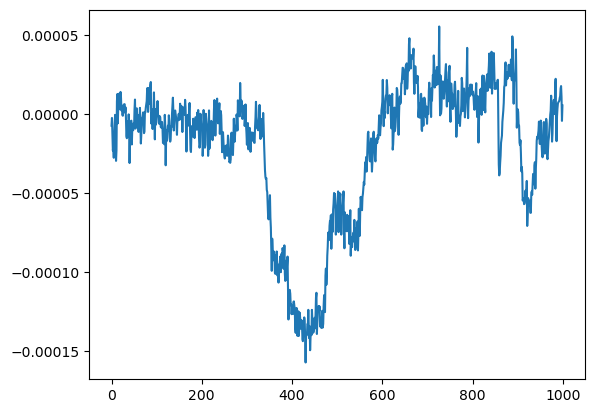

In [34]:
for i,reading in train_df.iterrows():
    eeg,_ = to_bipolar_montage(reading)

    val = eeg.get_data()
    print(val.shape)
    print(val[0][:1000][400])
    sns.lineplot(val[0][:1000])
    plt.show()
    break


(22, 301250)
-4.774332046508789e-05


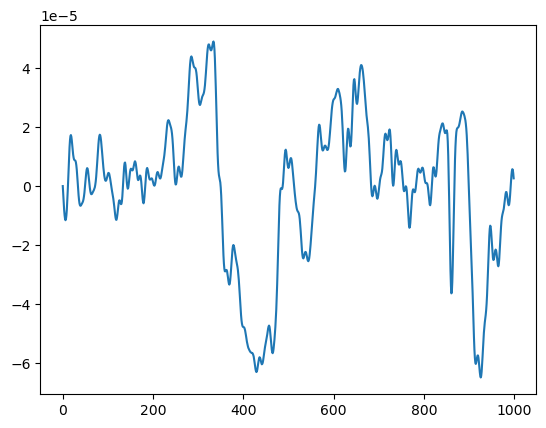

In [38]:
for i,reading in train_df.iterrows():
    eeg,_ = to_bipolar_montage(reading)

    val = eeg.get_data()
    print(val.shape)
    print(val[0][:1000][400])
    sns.lineplot(val[0][:1000])
    plt.show()
    break

In [114]:
class_dict = {0: '(null)', 1: 'spsw', 2: 'gped', 3: 'pled', 4: 'eyem', 5: 'artf', 6: 'bckg', 7: 'seiz', 8: 'fnsz', 9: 'gnsz', 10: 'spsz', 11: 'cpsz', 12: 'absz', 13: 'tnsz', 14: 'cnsz', 15: 'tcsz', 16: 'atsz', 17: 'mysz', 18: 'nesz', 19: 'intr', 20: 'slow', 21: 'eyem', 22: 'chew', 23: 'shiv', 24: 'musc', 25: 'elpp', 26: 'elst', 27: 'calb'}

In [115]:
import ast
def get_channel_based_annotation_data(lbl_path:str):
    """ Read the channel based annotations .lbl
        Args:
            tse_path(str):path to `.tse` file
        Return:
            A list of dictionaries
    """
    with open(lbl_path,"r") as lbl_file:
        lines = lbl_file.readlines()
        lines = [line.strip() for line in lines if line.startswith("label")]
    channel_annot= []
    for line in lines:
        line = str(line.strip('label = '))
        line = line.replace("{","(").replace("}",")")
        line = line.replace("[","(").replace("]",")")
     
        tuple_ = ast.literal_eval(line)
        channel_annot.append(
            {
                "channel":tuple_[4],
                "start_time":tuple_[2],
                "stop_time":tuple_[3],
                "class":class_dict[tuple_[5].index(1)]
            }
        )
    return channel_annot

In [116]:
l =[0,1,0,0,0,0]
print(l.index(1))

1


In [117]:
from tqdm import tqdm
import json


def compress_and_save(reading:pd.Series,save_dir:str=None):
    """ Convert bipolar_montage arrays into a numpy compressed file and save it while keeping the original file name structure
    Args:
        df(pd.Dataframe): the dataframe to the datasets
        dataset_directory(str): save directory
        subset: either `train` or `test`
    """
    
    bipolar_array,s_freq = to_bipolar_montage(reading)

    tse_annot = get_term_based_annotation_data(reading.tse)
    lbl_annot = get_channel_based_annotation_data(reading.lbl)

    npz_filepath = os.path.join(save_dir,f"{reading.base_name}.npz")
    
    term_annot = {
            "npz_filepath":npz_filepath,
            "s_freq":s_freq,
            "montage":reading.montage,
            "term_annot":tse_annot
        }

    channel_annot = {
            "npz_filepath":npz_filepath,
            "s_freq":s_freq,
            "montage":reading.montage,
            "channel_annot":lbl_annot
        } 

    # compress each bipolar_array and save to save_dir
    np.savez_compressed(npz_filepath,bipolar_array)

    return term_annot,channel_annot
    

In [118]:
from joblib import Parallel,delayed

In [119]:
def make_dataset(df:pd.DataFrame,dataset_directory:str ="../bipolar_eeg_dataset",subset:str="train"):
    save_dir = os.path.join(dataset_directory,subset)
    # create `dataset_directory` and `subset`
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    term_based = []
    channel_based = []
    with Parallel(n_jobs=4) as parallel:
        results  = parallel(
            delayed(compress_and_save)
            (reading,save_dir) 
            for i,reading in tqdm(df.iterrows(),total=len(df))
            )
        for result in results:
            term_based.append(result[0])
            channel_based.append(result[1])

    # write dictionaries to json
    with open(f"{dataset_directory}/term_based_annotation.json","w") as term_based_json:
        term_based_json.write(json.dumps(term_based))
    
    with open(f"{dataset_directory}/channel_based_annotation.json","w") as channel_based_json:
        channel_based_json.write(json.dumps(channel_based))

    
make_dataset(train_df.sample(4))

100%|██████████| 4/4 [00:00<00:00, 55.79it/s]
